## [A simple linear classification with scikit learn](https://github.com/hamidhosen42/ml-python/blob/master/linear-clf-final.ipynb) 

### লোড করে নেই আইরিস ডেটাসেট

In [1]:
from sklearn.datasets import load_iris

iris=load_iris()

X_temp=iris.data
y_temp=iris.target

### ভাগ করে ফেলি টেস্ট এবং ট্রেনিং ডেটাসেট (ফিচার স্কেলিং সহ)

এখানে আমাদের কাজ হচ্ছে ডেটাসেটকে দুভাগে ভাগ করে ফেলা। ৭৫% ব্যবহার হবে আমাদের ক্লাসিফায়ারকে ট্রেনিং করাতে। ২৫% যাবে ইভ্যালুয়েট করতে। ৪টা ফিচারের জায়গায় আমরা ব্যবহার করবো ২টা মাত্র। সিপাল দৈর্ঘ্য এবং প্রস্থ। শুধুমাত্র সিপাল অংশ।

এর পাশাপাশি আমরা ফিচার স্কেলিং করবো আমাদের ফিচারগুলোর ডেটা রেঞ্জ স্ট্যান্ডার্ডাইজ করার জন্য। প্রতিটা ফিচারের জন্য এটা সব ভ্যালুকে গড় করে সেটাকে বিয়োগ দেয় ওই ফিচার ভ্যালু থেকে। এরপর তার উত্তরকে ভাগ দেয় সেটার স্ট্যান্ডার্ড ডেভিয়েশন দিয়ে। আমাদের এই স্কেলিং এর পর প্রতিটা ফিচারের গড় হবে শূন্য। পাশাপাশি স্ট্যান্ডার্ড ডেভিয়েশন হচ্ছে ১।

এর ফলে ভ্যালুগুলোর স্ট্যান্ডার্ডাইজেশন হয়ে আসে। এটা খানিকটা স্ট্যান্ডার্ড প্র্যাক্টিস হয়ে গেছে ইন্ডিপেন্ডেন্ট ফিচার/ভ্যারিয়েবলগুলোর রেঞ্জকে একটা স্কেলের মধ্যে নিয়ে আসা। এটাকে আমরা ডেটা নর্মালাইজেশন বলতে পারি। এটা আমরা করি ডেটা প্রি-প্রসেসিং এর সময়।

ডেটার রেঞ্জ নিয়ে আমাদের যেহেতু কোন ফিল্টার নেই, সেকারণে একটা ডেটাসেটে বিক্ষিপ্ত ডেটা মেশিন লার্নিংকে বিপদে ফেলতে পারে। বড় বড় ভ্যালুগুলো ফাইনাল আউটকামে সমস্যা করে। আর সেকারণে মেশিন লার্নিং অ্যালগরিদমকে ভালোভাবে কাজ করানোর জন্য এই স্কেলিং দরকার পড়ে অনেক সময়। তবে, ""গ্রাডিয়েন্ট ডিসেন্ট"" কনভার্জেন্স ভালো কাজ করে স্কেলিং দিয়ে। মজার কথা হচ্ছে এক্স ভ্যালুগুলোকে প্লট করলে আগে এবং পরে একই জিনিস পাওয়া যায়।

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
# শুধুমাত্র প্রথম দুটো অ্যাট্রিবিউট নিয়ে আমাদের ডেটাসেট
X, y = X_temp[:, [0,1]], y_temp

In [4]:
# আমাদের টেস্টসেট হবে ২৫%, দৈবচয়নের ভিত্তিতে 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [5]:
# ফিচারগুলোকে স্ট্যান্ডার্ডাইজ করছি এখানে 
scaler=preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

চলুন, দেখি ফিচার স্কেলিং এর পর কি অবস্থা? এখানে গড় হচ্ছে "০", স্ট্যান্ডার্ড ডেভিয়েশন হচ্ছে "১"। ট্রেনিংসেটে ঠিকমতো হবে সবকিছু, তবে টেস্টসেটে ব্যাপারটা কাছাকাছি হবে।

In [6]:
import numpy as np

print ('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train),np.std(X_train)))

Training set mean:0.00 and standard deviation:1.00


In [7]:
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test),np.std(X_test)))

Testing set mean:0.13 and standard deviation:0.71


In [8]:
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.mean(X_test),np.std(X_test)))

Testing set mean:0.13 and standard deviation:0.71


ফিচার স্কেলিং এর পর ট্রেনিং ডেটাকে প্লটিং করি। একই জিনিস।

In [9]:
import matplotlib.pylab as plt

In [10]:
# তিন প্রজাতির তিনটা আলাদা রং, মার্কার সহ 
colour_mk = [ ['red','s'], ['green','o'], ['blue','x']]
plt.figure('Training Data')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

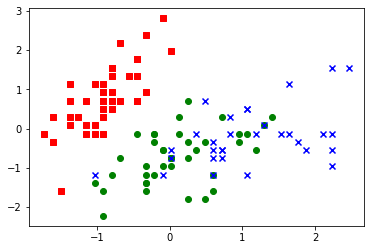

In [11]:
for i in range(len(colour_mk)):
    xs=X_train[:,0][y_train==i]
    ys=X_train[:,1][y_train==i]
    plt.scatter(xs,ys,c=colour_mk[i][0],marker=colour_mk[i][1])

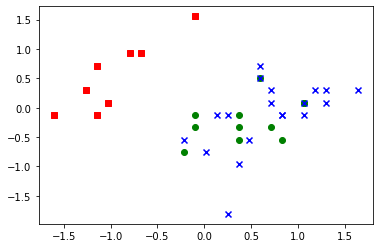

In [12]:
for i in range(len(colour_mk)):
    xs=X_test[:,0][y_test==i]
    ys=X_test[:,1][y_test==i]
    plt.scatter(xs,ys,c=colour_mk[i][0],marker=colour_mk[i][1])

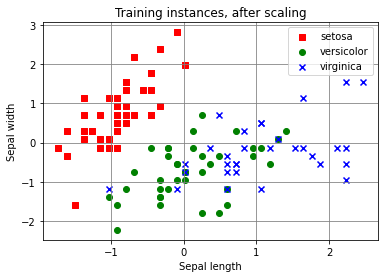

In [13]:
for i in range(len(colour_mk)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colour_mk[i][0], marker=colour_mk[i][1])

#plt.rcParams['axes.facecolor'] = 'white'
plt.style.use('default')
plt.grid(c='grey')

# Ploting perimeter
plt.title('Training instances, after scaling')
plt.legend(iris.target_names)#level
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

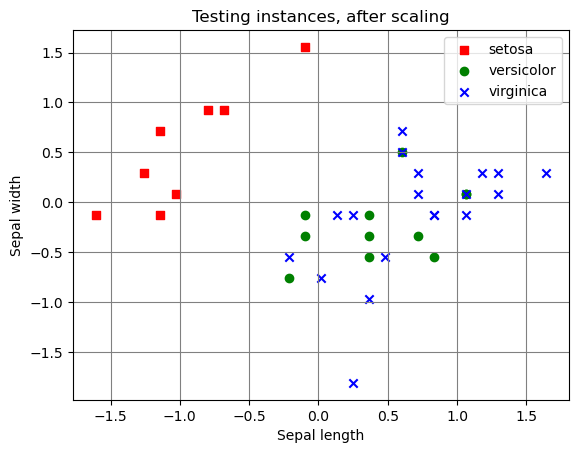

In [14]:
for i in range(len(colour_mk)):
    xs=X_test[:,0][y_test==i]
    ys=X_test[:,1][y_test==i]
    plt.scatter(xs,ys,c=colour_mk[i][0],marker=colour_mk[i][1])

plt.style.use('default')
plt.grid(c='grey')

# প্লটিং প্যারামিটার 
plt.title('Testing instances, after scaling')
plt.legend(iris.target_names)#level
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### একটা লিনিয়ার বাইনারি ক্লাসিফিকেশন


মানুষের মাথা প্যাটার্ন বুঝতে ওস্তাদ। এই প্লট থেকে কী বুঝতে পারছেন? ঠিক ধরেছেন। খালি চোখে সেটোসা প্রজাতিকে বোঝা যাচ্ছে একদম আলাদা করে। কেমন হয়, কমপ্লেক্সিটি এড়াতে আমরা যদি বের করতে চাই শুধুমাত্র সেটোসা প্রজাতি বের করতে চাই। মানে, প্রেডিক্ট করতে হবে হয় "সেটোসা" অথবা "সেটোসা না"? এখন আমাদের দুটো টার্গেট ভ্যারিয়েবল। সেকারণে এটাকে আমরা কনভার্ট করছি বাইনারি ক্লাসিফিকেশন টাস্কে। আমাদের দুটো টার্গেট। হয় "০" অথবা "১", তাহলে কী করতে হবে? "১" নম্বর এবং "২" নম্বর ক্লাসকে আমরা "১" বানিয়ে ফেলেছি।

In [15]:
import copy
y_train_setosa=copy.copy(y_train)

In [16]:
# আমাদের ট্রেনিংসেটের ১ এবং ২ ক্লাসকে ১ বানিয়ে ফেলছি 
y_train_setosa[y_train_setosa>0]=1

In [17]:
y_test_setosa=copy.copy(y_test)
y_test_setosa[y_test_setosa>0]=1

In [18]:
# এখন দেখি ট্রেনিং টার্গেট ক্লাসগুলো কী কী?
print(y_train_setosa)

[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


ছবিটা দেখে কী মনে হচ্ছে? একটা প্রজাতি একেবারে আলাদা। এটা আমাদের জন্য ভালো।

আমরা যদি ভালোমতো করে ছবিটা দেখি - তাহলে "সেটোসা" প্রজাতিতে আমরা একেবারে আলাদা হাইপারপ্লেন এ দেখতে পাচ্ছি। অর্থাৎ একটা লাইন টেনে দুটো প্রজাতিকে আলাদা করতে পারছি। ব্যাপারটা কমন মেশিন লার্নিং কনসেপ্টে। আমাদের প্রশ্ন হচ্ছে নতুন মাপজোক দিলে সেটা থেকে বের করতে হবে নতুন জিনিসটা কোন প্রজাতির? এখন বাকি প্রজাতিগুলো যেহেতু একটা আরেকটার ভেতরে ঢুকে গেছে, সেকারনে ওই দুটোকে একটা প্রজাতি হিসেবে দেখাচ্ছি।

যেহেতু, আমরা "সেটোসা"কে একেবারে একটা লাইন টেনে আলাদা করতে পারছি, সেকারণে এই জিনিসটাকে একটা লিনিয়ার ক্লাসিফিকেশন মডেলে পাঠাতে পারি। মানে, একটা সোজা লাইন টেনে দুটো টার্গেট ক্লাসকে আলাদা করবো এখানে। এটাকে আমরা বলতে পারি ফিচার স্পেসে একটা হাইপারপ্লেন। দুটো ফিচার স্পেসের মধ্যে লাইনটা ডিসিশন বাউন্ডারি। কে কোন প্রজাতির, সেটা নির্ভর করবে কে ওই লাইনটার কোন দিকে আছে।

মনে আছে, আমাদের ওই এরর কমানোর কথা? লিস্ট স্কয়ার রিগ্রেশন, লস ফাংশন? যেটা আসলে বের করে আমাদের প্রতিটা ইনস্ট্যান্স থেকে ডিসিশন বাউন্ডারি কতো দুরে। এখানে আমাদের এই অ্যালগরিদম হাইপারপ্লেনের "কোএফিসিয়েন্ট" জানবে লসকে কমিয়ে। এখানে আমরা ইন্টারসেপ্টও জানবো সামনে।

এ কারণে আমরা সাইকিট লার্ন থেকে SGDClassifier ব্যবহার করবো এই লিনিয়ার মডেল তৈরি করতে। আমাদের সাইকিট লার্নে "SGDClassifier" মডেল হিসেবে থাকলেও এটা আসলে ক্লাসিফায়ার নয়। বরং এটা একটা লিনিয়ার তবে এটাকে অপ্টিমাইজড করা হয়েছে স্টোকাস্টিক গ্র্যাডিয়েন্ট ডিসেন্ট দিয়ে।

এই কাজ আমরা আগেও করেছি। "linear_model" কে ইম্পোর্ট করে নিয়ে আসছি sklearn থেকে। একটা ক্লাসিফায়ারের ইনস্ট্যান্স তৈরি করে হাইপারপ্যারামিটারকে বলছি "লগ" লস ফাংশন ব্যবহার করতে। এখানে ক্লাসিফায়ার হচ্ছে "linear_model.SGDClassifier"। এমুহুর্তে ব্যবহার করবো সব ডিফল্ট ভ্যালু। বেশি ঝামেলায় যাবো না।

In [19]:
from sklearn import linear_model
clf=linear_model.SGDClassifier(loss='log',random_state=42)

এখন কি বাকি? ট্রেনিং করানো। ফিট মেথড কল করছি আমাদের ক্লাসিফায়ারকে ট্রেনিং করানোর জন্য। এখানে আমাদের ট্রেনিং ডেটা হচ্ছে "সেটোসা" সেট।

In [20]:
clf.fit(X_train,y_train_setosa)

SGDClassifier(loss='log', random_state=42)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

লিনিয়ার মডেল। মনে আছে "y = mx + b" এর কথা? নাহ, অংক পিছু ছাড়ছেই না, আমাদেরকে m এবং b পেতে হবে। মানে, clf.coef এবং clf.intercept ছাড়া আমাদের গতি নেই।

এখন এই সমীকরণকে y = mx + b ধারণায় লিখলে কেমন দেখা যাবে?

In [21]:
print(clf.coef_,clf.intercept_)

[[ 21.76180378 -10.51985219]] [13.90763026]


In [22]:
from IPython.display import Image
Image(url="A simple linear classification with scikit learn image/cv.png")

### ডিসিশন বাউন্ডারি Code

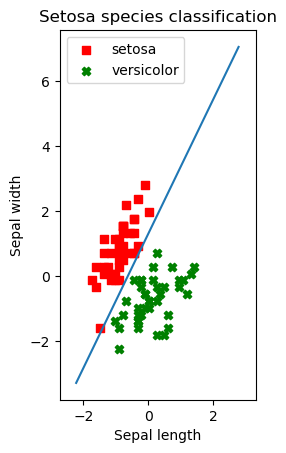

In [23]:
x_min,x_max=X_train[:,0].min()-0.5,X_train[:,0].max()+0.5
y_min,y_max=X_train[:,1].min()-0.5,X_train[:,1].max()+0.5

xs=np.arange(x_min,x_max,0.5) 

fig,axes=plt.subplots()

axes.set_aspect('equal')
axes.set_title('Setosa species classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')

axes.set_xlim(x_min,x_max)
axes.set_xlim(y_min,y_max)

plt.sca(axes)

plt.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],c='red',marker='s')
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],c='green',marker='X')

ys=(-clf.intercept_[0]-xs*clf.coef_[0,0])/clf.coef_[0,1]
plt.legend(iris.target_names)
plt.plot(xs,ys)
plt.show()

ঠিক ধরেছেন। এই নীল/কালো রেখাটাই হচ্ছে আমাদের ডিসিশন বাউন্ডারি। প্রতিবার ৩০.০৭ x "সিপাল দৈর্ঘ্য" - ১৭.৭৮ x "সিপাল প্রস্থ্য" - ১৭.৩১ এর আউটপুট যখন শূন্য থেকে বড় হবে তখন সেটা হবে আইরিস সেটোসা, মানে ক্লাস ০।

চলুন, একটা প্রেডিক্ট করি। ফুলটা কি সেটোসা কি না? যদি একটা ফুলের পেটাল প্রস্থ্য ৪.৬ এবং পেটাল দৈর্ঘ্য ৩.২ হয়, তাহলে প্রজাতিটা কি সেটোসা হবে কি হবে না?

In [24]:

print ('If the flower has 4.6 petal width and 3.2 petal length is a {}'.format(iris.target_names[clf.predict(scaler.transform([[4.6, 3.2]]))]))

If the flower has 4.6 petal width and 3.2 petal length is a ['setosa']


### Decision surface of a decision tree using paired features

(0.0, 7.88, -0.9, 3.4800000000000044)

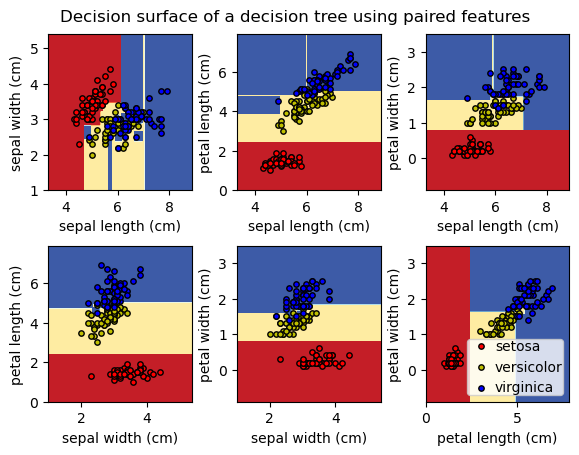

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#some perimeter
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):

    # Two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Training
    clf = DecisionTreeClassifier().fit(X, y)

    # Decision Boundari plot
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Training point plot
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

In [26]:
plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()